In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # used in dv
import joblib #save models 
import warnings #supresses unncessary warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split #Split data into training/testing sets.
from sklearn.preprocessing import StandardScaler #standardizes the data (mean=0, std=1)
from sklearn.ensemble import RandomForestClassifier #ML algorithms
from sklearn.linear_model import LogisticRegression #ML algorithms
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Metrics to evaluate model performance.


In [14]:
df = pd.read_csv('heart.csv')

# Rename columns for clarity, make it into human-readable form 
df.rename(columns={
    'age': 'Age',
    'sex': 'Sex (1 = Male, 0 = Female)',
    'cp': 'Chest Pain Type (0-3)',
    'trestbps': 'Resting Blood Pressure',
    'chol': 'Cholesterol (mg/dl)',
    'fbs': 'Fasting Blood Sugar > 120 (1 = True)',
    'restecg': 'Resting ECG Results',
    'thalach': 'Max Heart Rate Achieved',
    'exang': 'Exercise Induced Angina (1 = Yes)',
    'oldpeak': 'ST Depression',
    'slope': 'Slope of Peak Exercise ST',
    'ca': 'No. of Major Vessels (0–3)',
    'thal': 'Thalassemia (1 = Normal; 2 = Fixed Defect; 3 = Reversible)',
    'target': 'Heart Disease (1 = Yes, 0 = No)'
}, inplace=True)


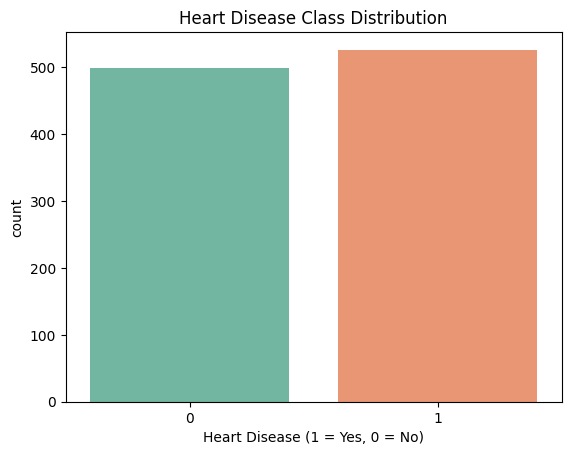

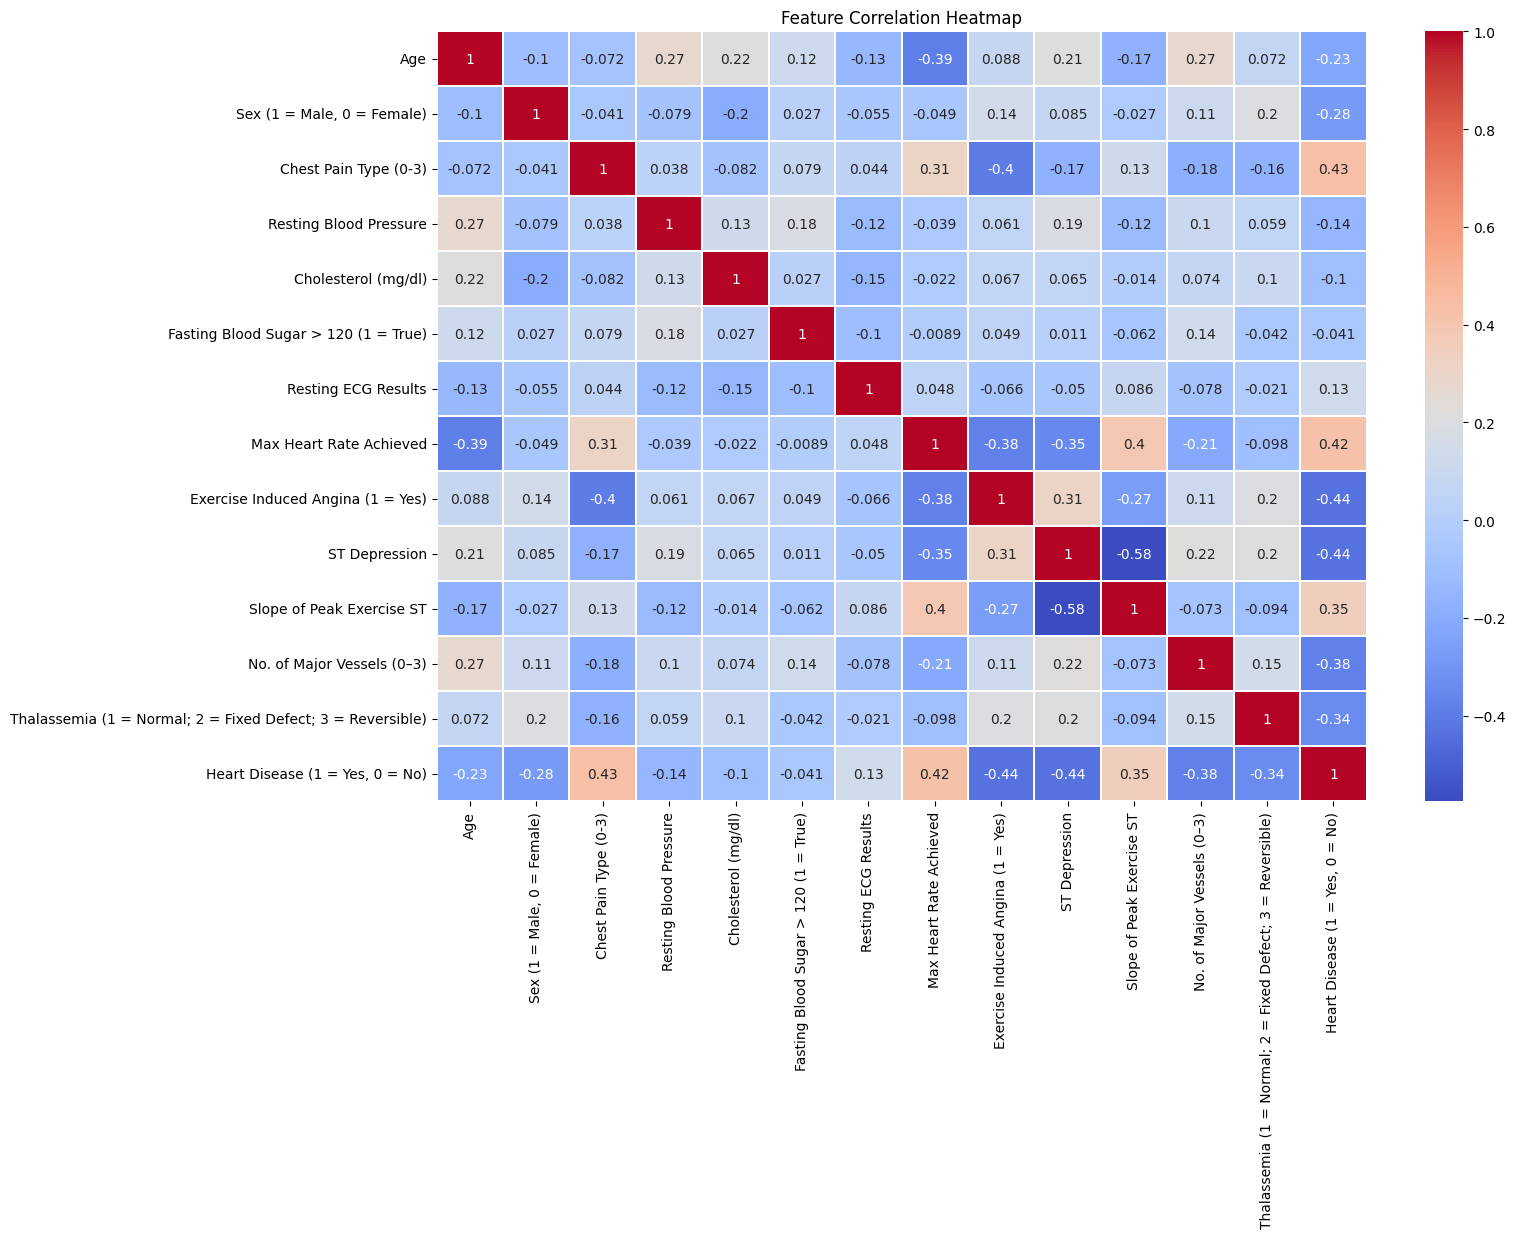

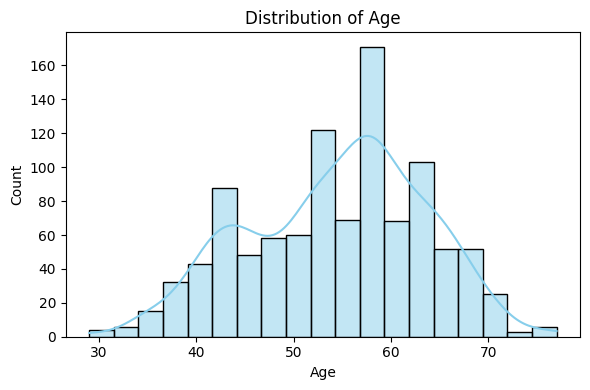

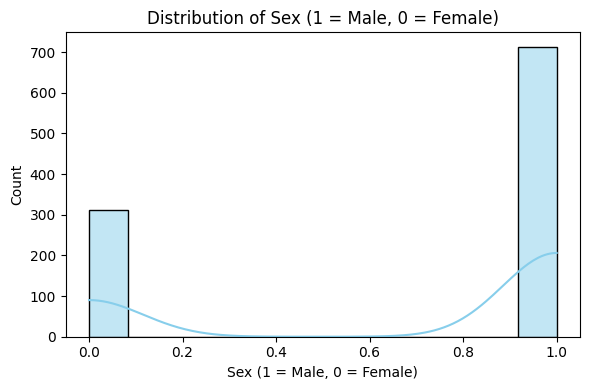

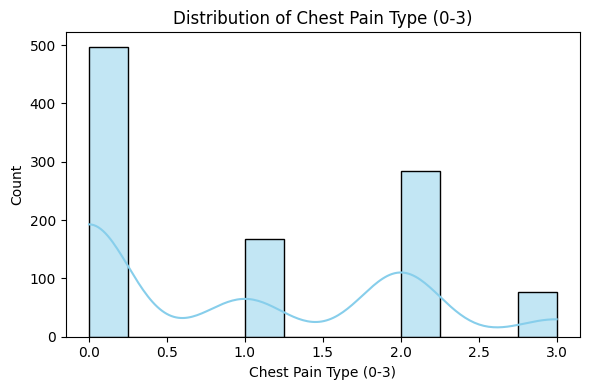

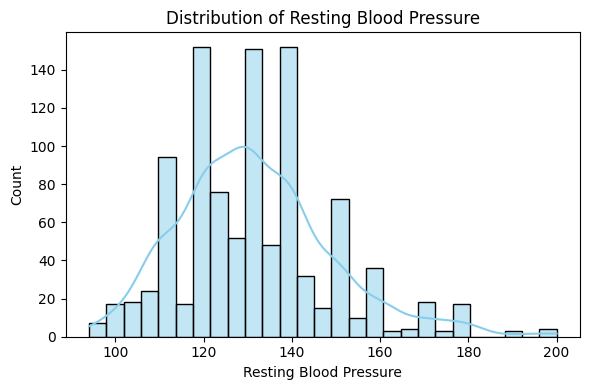

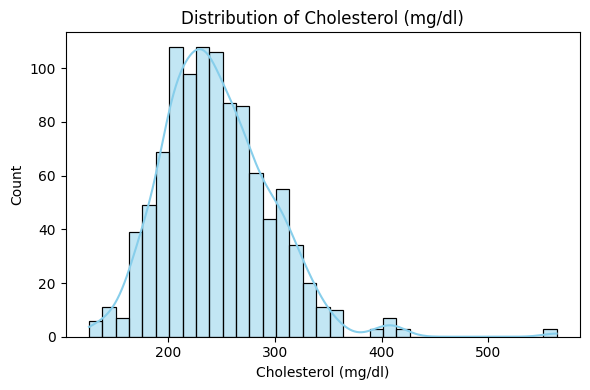

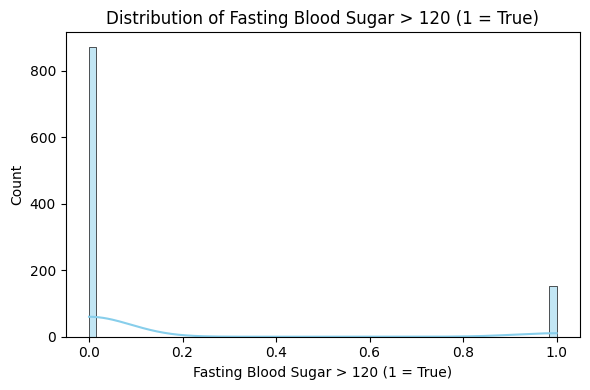

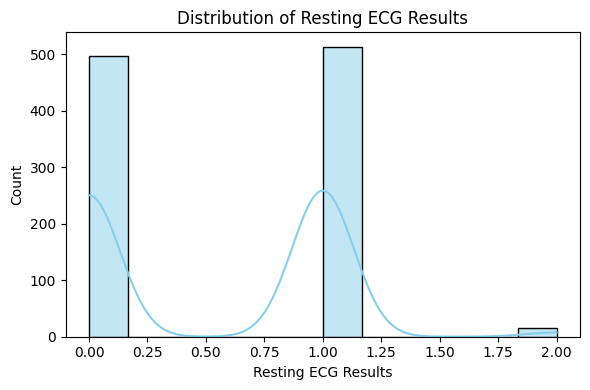

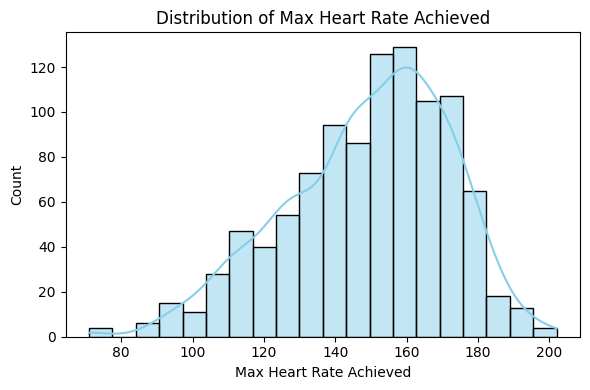

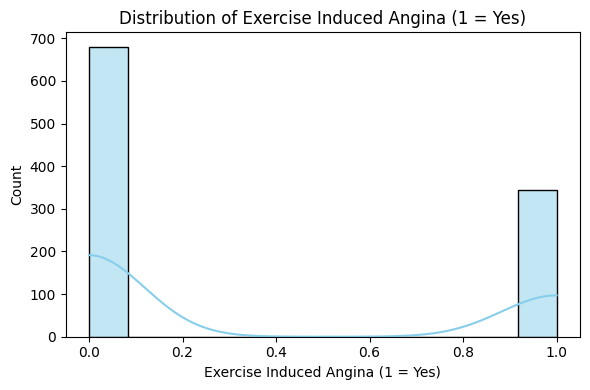

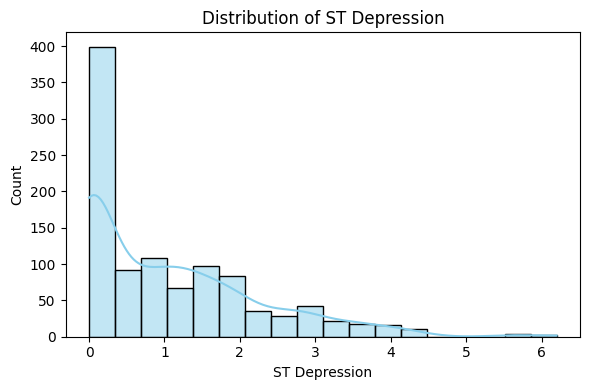

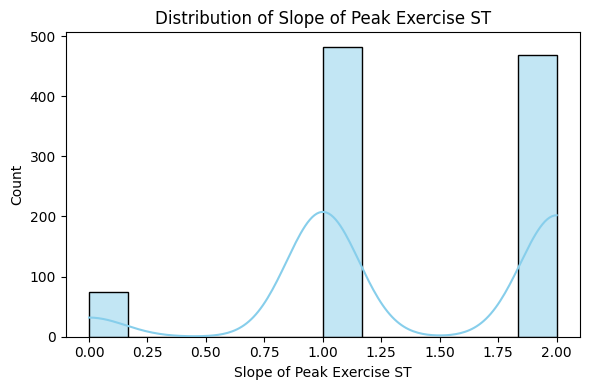

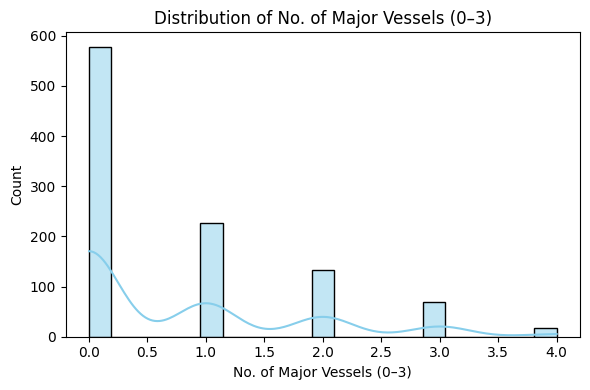

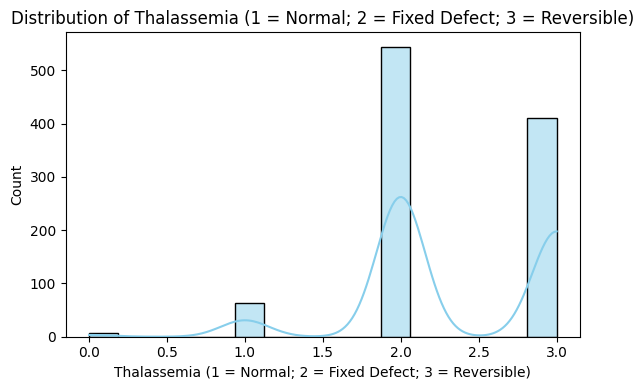

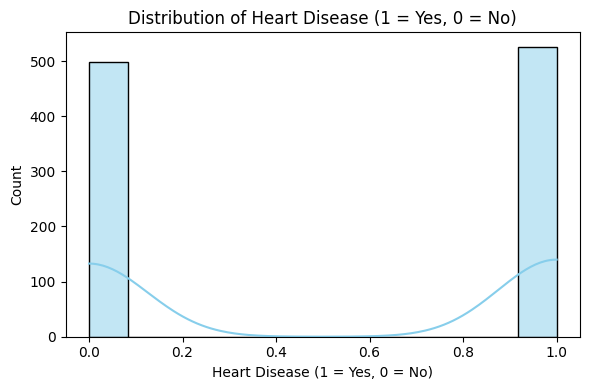

In [16]:
# Target distribution
sns.countplot(data=df, x='Heart Disease (1 = Yes, 0 = No)', palette='Set2') #1=have disease , 0 = dont have disease
plt.title("Heart Disease Class Distribution")
plt.show()

# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.2)
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution plots for each numerical column
numeric_cols = df.select_dtypes(include=np.number).columns.tolist() #selects only numeric columns.
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


In [18]:
# Create new binned features
df['Age Group'] = pd.cut(df['Age'], bins=[28, 40, 55, 70, 100], labels=['Young', 'Middle-Aged', 'Senior', 'Elderly']) #separates continuous values to categories
df['Cholesterol Level'] = pd.cut(df['Cholesterol (mg/dl)'], bins=[0, 200, 239, 1000], labels=['Normal', 'Borderline High', 'High'])

# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Drop any missing values
df.dropna(inplace=True)


In [19]:
# Define features and target

#Splits dataset into features and target
X = df.drop('Heart Disease (1 = Yes, 0 = No)', axis=1) # all cols except target
y = df['Heart Disease (1 = Yes, 0 = No)'] #target only 

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42) #200 trees 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


🎯 Random Forest Accuracy: 98.54 %

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



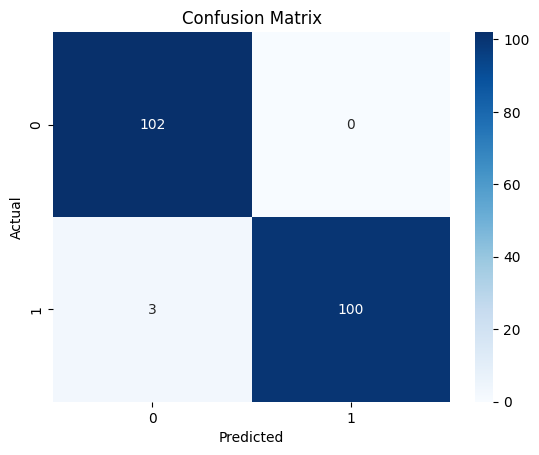

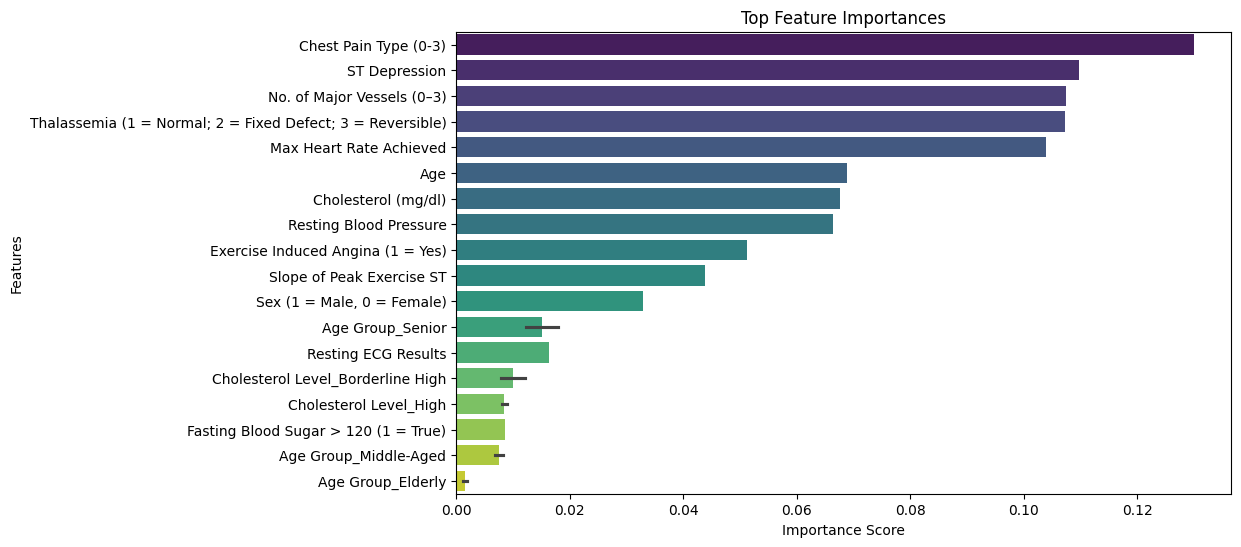

In [22]:
# Accuracy and classification report
print("🎯 Random Forest Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importance
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Top Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [21]:
# Reload raw data for compatibility with Streamlit inputs
raw_df = pd.read_csv("heart.csv")
X_raw = raw_df.drop("target", axis=1)
y_raw = raw_df["target"]

# Rescale raw data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Reorder columns for consistency
column_order = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                'restecg', 'thalach', 'exang', 'oldpeak',
                'slope', 'ca', 'thal']
X_df_cleaned = pd.DataFrame(X_scaled, columns=column_order)
X_df_cleaned["target"] = y_raw

# Save dataset
X_df_cleaned.to_csv("heart_cleaned.csv", index=False)
print("✅ Saved cleaned dataset to heart_cleaned.csv")

# Train logistic regression for deployment
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_scaled, y_raw, test_size=0.2, random_state=42)
lr_model = LogisticRegression()
lr_model.fit(X_train_lr, y_train_lr)

# Save model and scaler
joblib.dump(lr_model, "model.joblib")
joblib.dump(scaler, "scaler.joblib")
print("✅ Saved logistic regression model and scaler")


✅ Saved cleaned dataset to heart_cleaned.csv
✅ Saved logistic regression model and scaler
